In [6]:
from collections import OrderedDict
import re
import os

import matplotlib.pyplot as plt

import pandas as pd
import seaborn as sns
import torch
from tqdm.notebook import tqdm
import ipywidgets
from plot_utils import get_model_names_for_degree

from eval import get_run_metrics, read_run_dir, get_model_from_run
from plot_utils import basic_plot, collect_results, relevant_model_names

%matplotlib inline
%load_ext autoreload
%autoreload 2
sns.set_theme('notebook', 'darkgrid')
palette = sns.color_palette('colorblind')

run_dir = "../models"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
df = read_run_dir(run_dir)

['chebyshev_linear_regression_toy_standard_0.00005_lr_no_noise_no_curriculum']
   run_id                      task        model  \
0  model1  kernel_linear_regression  Transformer   

                                              kwargs  num_tasks  num_examples  \
0  basis_dim=11_different_degrees=True_highest_de...         -1            -1   

   n_dims  n_layer  n_head                                           run_name  
0       1       12       8  chebyshev_linear_regression_toy_standard_0.000...  


In [8]:
task = "kernel_linear_regression"

run_id = 'model1'
run_path = '../models/kernel_linear_regression/model1' # move the downloaded model into the folder models/kernel_linear_regression
metrics = get_run_metrics(run_path, include_noise=True, ground_truth_loss=False, smoothing=0.00)  # these are normally precomputed at the end of training


../models/kernel_linear_regression/model1/metrics.json
no metrics found
0.2
torch.Size([64, 41, 2])
torch.Size([64, 41, 2])
torch.Size([64, 41, 2])
torch.Size([64, 41, 2])
torch.Size([64, 41, 2])
torch.Size([64, 41, 2])
torch.Size([64, 41, 2])
torch.Size([64, 41, 2])
torch.Size([64, 41, 2])
torch.Size([64, 41, 2])
torch.Size([64, 41, 2])
torch.Size([64, 41, 2])
torch.Size([64, 41, 2])
torch.Size([64, 41, 2])
torch.Size([64, 41, 2])
torch.Size([64, 41, 2])
torch.Size([64, 41, 2])
torch.Size([64, 41, 2])
torch.Size([64, 41, 2])
torch.Size([64, 41, 2])
0.2
torch.Size([64, 41, 3])
torch.Size([64, 41, 3])
torch.Size([64, 41, 3])
torch.Size([64, 41, 3])
torch.Size([64, 41, 3])
torch.Size([64, 41, 3])
torch.Size([64, 41, 3])
torch.Size([64, 41, 3])
torch.Size([64, 41, 3])
torch.Size([64, 41, 3])
torch.Size([64, 41, 3])
torch.Size([64, 41, 3])
torch.Size([64, 41, 3])
torch.Size([64, 41, 3])
torch.Size([64, 41, 3])
torch.Size([64, 41, 3])
torch.Size([64, 41, 3])
torch.Size([64, 41, 3])
torch.Si

# Plot pre-computed metrics

chebyshev_linear_regression_toy_standard_0.00005_lr_no_noise_no_curriculum model1
../models/kernel_linear_regression/model1/metrics.json
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
{'degree-1': {'chebyshev_1_driver=None': {'mean': [1.3586030006408691, 0.5372331738471985, 8.194766046298874e-12, 5.755955472452542e-14, 9.163911220567283e-14, 2.0833034529801377e-14, 1.8640723526927062e-14, 3.203889248088593e-14, 2.37022722412647e-14, 7.378422688369274e-14, 1.5091054084538993e-14, 2.9783975578814154e-14, 1.7432935859305367e-14, 1.623094528517468e-14, 2.5439892569921116e-14, 3.088867256049142e-14, 1.6196210158073675e-14, 1.7225424645689325e-14, 2.17823263766459e-14, 1.689037059900752e-14, 1.688258128402457e-14, 2.0747057297523276e-14, 1.2570386524496813e-14, 3.2635373082342406e-14, 2.7793793742209028e-14, 1.9528822325530146e-14, 1.2324254843650712e-14, 1.3008964090959092e-14, 1.799605691516718e-14, 6.326055402173375e-14, 2.430877832468488e-14, 5.969949876246869e-14, 1.2207233853855741e-14, 1

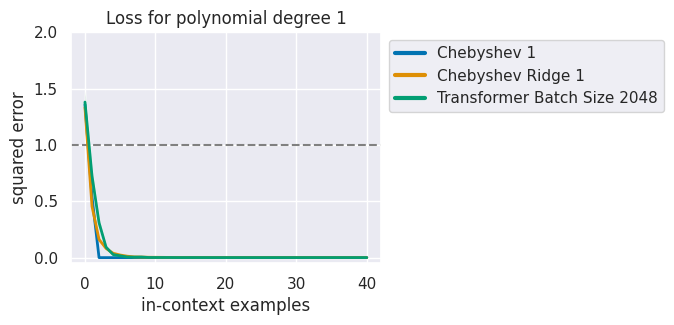

None
dict_keys(['degree-1', 'degree-10', 'degree-11', 'degree-2', 'degree-3', 'degree-4', 'degree-5', 'degree-6', 'degree-7', 'degree-8', 'degree-9'])
dict_keys(['Chebyshev 2', 'Chebyshev Ridge 2', 'Transformer Batch Size 2048'])


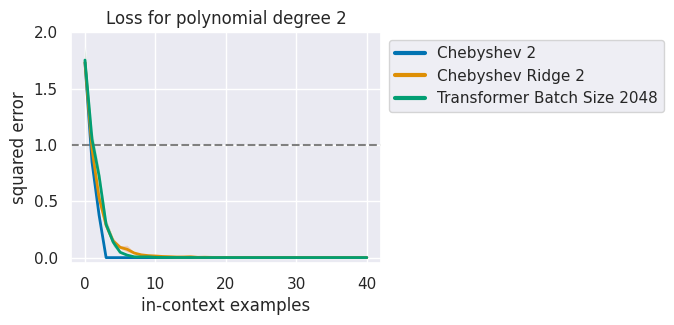

None
dict_keys(['degree-1', 'degree-10', 'degree-11', 'degree-2', 'degree-3', 'degree-4', 'degree-5', 'degree-6', 'degree-7', 'degree-8', 'degree-9'])
dict_keys(['Chebyshev 3', 'Chebyshev Ridge 3', 'Transformer Batch Size 2048'])


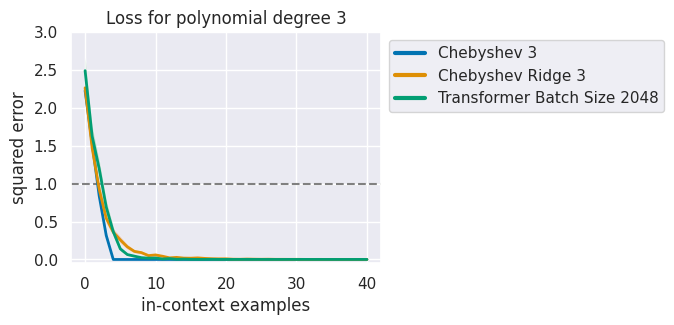

None
dict_keys(['degree-1', 'degree-10', 'degree-11', 'degree-2', 'degree-3', 'degree-4', 'degree-5', 'degree-6', 'degree-7', 'degree-8', 'degree-9'])
dict_keys(['Chebyshev 4', 'Chebyshev Ridge 4', 'Transformer Batch Size 2048'])


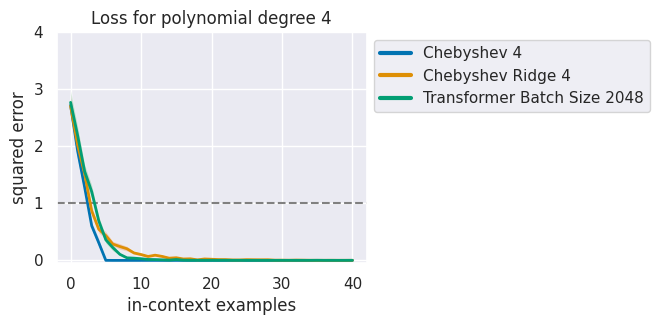

None
dict_keys(['degree-1', 'degree-10', 'degree-11', 'degree-2', 'degree-3', 'degree-4', 'degree-5', 'degree-6', 'degree-7', 'degree-8', 'degree-9'])
dict_keys(['Chebyshev 5', 'Chebyshev Ridge 5', 'Transformer Batch Size 2048'])


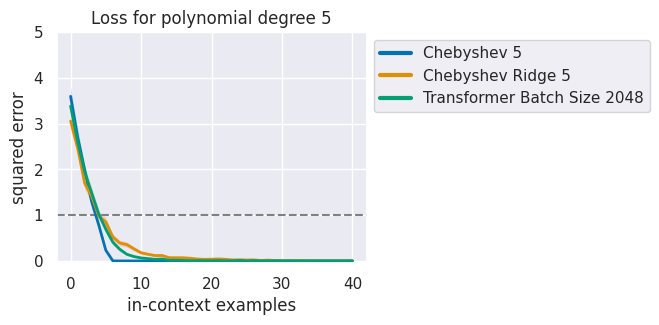

None
dict_keys(['degree-1', 'degree-10', 'degree-11', 'degree-2', 'degree-3', 'degree-4', 'degree-5', 'degree-6', 'degree-7', 'degree-8', 'degree-9'])
dict_keys(['Chebyshev 6', 'Chebyshev Ridge 6', 'Transformer Batch Size 2048'])


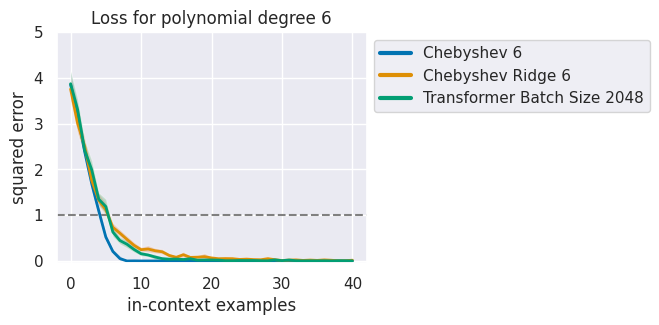

None
dict_keys(['degree-1', 'degree-10', 'degree-11', 'degree-2', 'degree-3', 'degree-4', 'degree-5', 'degree-6', 'degree-7', 'degree-8', 'degree-9'])
dict_keys(['Chebyshev 7', 'Chebyshev Ridge 7', 'Transformer Batch Size 2048'])


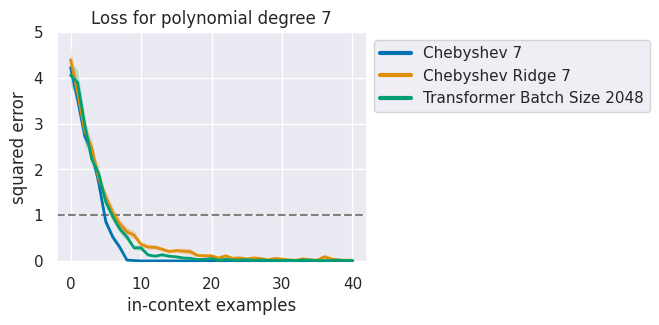

None
dict_keys(['degree-1', 'degree-10', 'degree-11', 'degree-2', 'degree-3', 'degree-4', 'degree-5', 'degree-6', 'degree-7', 'degree-8', 'degree-9'])
dict_keys(['Chebyshev 8', 'Chebyshev Ridge 8', 'Transformer Batch Size 2048'])


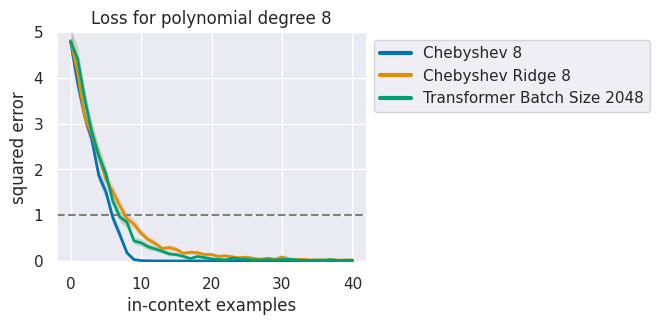

None
dict_keys(['degree-1', 'degree-10', 'degree-11', 'degree-2', 'degree-3', 'degree-4', 'degree-5', 'degree-6', 'degree-7', 'degree-8', 'degree-9'])
dict_keys(['Chebyshev 9', 'Chebyshev Ridge 9', 'Transformer Batch Size 2048'])


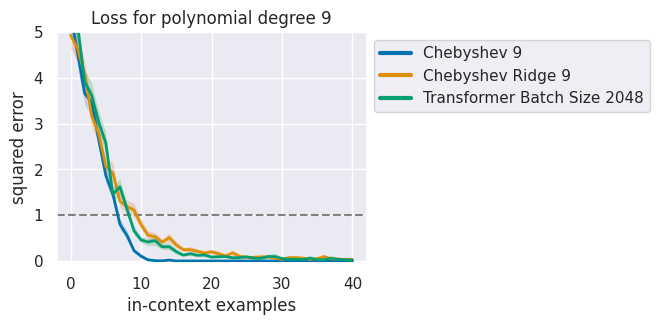

None
dict_keys(['degree-1', 'degree-10', 'degree-11', 'degree-2', 'degree-3', 'degree-4', 'degree-5', 'degree-6', 'degree-7', 'degree-8', 'degree-9'])
dict_keys(['Chebyshev 10', 'Chebyshev Ridge 10', 'Transformer Batch Size 2048'])


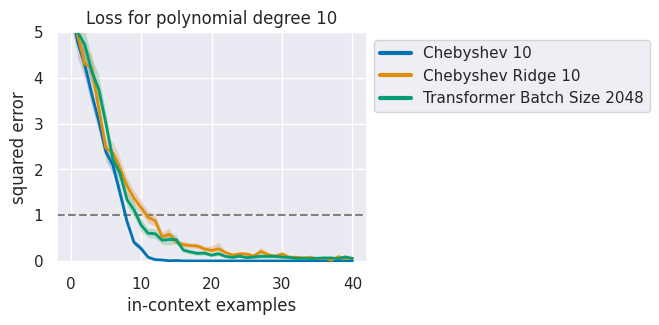

None
dict_keys(['degree-1', 'degree-10', 'degree-11', 'degree-2', 'degree-3', 'degree-4', 'degree-5', 'degree-6', 'degree-7', 'degree-8', 'degree-9'])
dict_keys(['Chebyshev 11', 'Chebyshev Ridge 11', 'Transformer Batch Size 2048'])


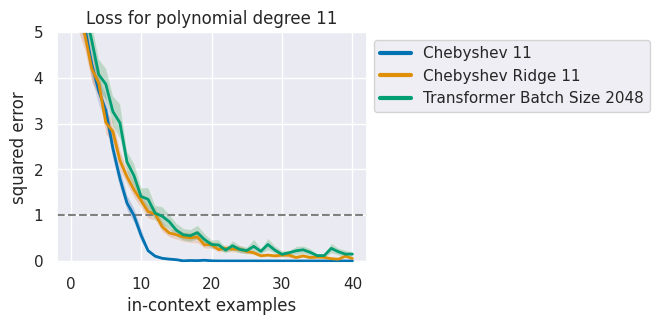

In [9]:
def valid_row(r, run_id):
    return r.task == task and r.run_id == run_id

#note: to refresh the graphs you need to delete the metrics file in models/kernel_linear_regression/model1
metrics = collect_results(run_dir, df, valid_row=lambda x: valid_row(x, run_id), smoothing=0.00)
print(metrics["degree-" + str(1)])

_, conf = get_model_from_run(run_path, only_conf=True)
n_dims = conf.model.n_dims


ylims = [2, 2, 3, 4, 5, 5, 5, 5, 5, 5, 5]
for degree in range(1, 12):
    models = get_model_names_for_degree(degree)
    print(models)
    print(metrics.keys())
    print(metrics["degree-" + str(degree)].keys())
    basic_plot(metrics["degree-" + str(degree)], models=models, ylim=ylims[degree-1])
    plt.title("Loss for polynomial degree " + str(degree))
    plt.savefig("graphs/degree-" + str(degree) + ".png", dpi=300, bbox_inches='tight')
    plt.show()